In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta  


# Importing datsets we are going to use

In [2]:
#Here we can just import all datsets we're going to use 
daily_vaccines = pd.read_csv('cleaned/us-daily-vaccines-discretize-normalized.csv')
display(daily_vaccines)
covid_19_data = pd.read_csv('cleaned/Novel Corona Virus 2019 Dataset/covid_19_data_normalized.csv')
display(covid_19_data)
#Should we transform dates or just drop/ignore?
#We can transorm it using this
#test_df['Date'].dt.strftime("%Y%m%d").astype(int)
covid_19_world = pd.read_csv("cleaned/COVID-19 World Vaccination Progress/country_vaccinations_normalized.csv")
display(covid_19_world)

,Day,daily_vaccinations
0,2021-01-31,0.228328
1,2021-02-28,0.526468
2,2021-03-31,0.818961


,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,2.940369e-09,0.000000,0.0
1,2020-01-23,2.940369e-09,0.000000,0.0
2,2020-01-24,5.880739e-09,0.000000,0.0
3,2020-01-25,5.880739e-09,0.000000,0.0
4,2020-01-26,1.470185e-08,0.000000,0.0
...,...,...,...,...
462,2021-04-28,9.477060e-02,0.090126,0.0
463,2021-04-29,9.494173e-02,0.090260,0.0
464,2021-04-30,9.511204e-02,0.090423,0.0
465,2021-05-01,9.524525e-02,0.090500,0.0


,date,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2020-12-20,0.000533,0.000818,0.000000
1,2020-12-21,0.000588,0.000904,0.000000
2,2020-12-22,0.000588,0.000904,0.000000
3,2020-12-23,0.000966,0.001483,0.000000
4,2020-12-24,0.000966,0.001483,0.000000
...,...,...,...,...
115,2021-04-14,0.186577,0.182325,0.200872
116,2021-04-15,0.189953,0.185129,0.205632
117,2021-04-16,0.193752,0.187954,0.211164
118,2021-04-17,0.197190,0.190531,0.216040


# Linear Regression us-daily-vaccines-normalized

In [3]:
daily_vaccines = pd.read_csv('cleaned/us-daily-vaccines-normalized.csv')
daily_vaccines['Day'] = pd.to_datetime(daily_vaccines['Day'])
daily_vaccines['date_delta'] = (daily_vaccines['Day'] - daily_vaccines['Day'].min())  / np.timedelta64(1,'D')
daily_vaccines.head()

,Day,daily_vaccinations,date_delta
0,2021-02-09,0.089862,27.0
1,2021-03-13,0.160251,59.0
2,2021-02-13,0.100012,31.0
3,2021-01-13,0.057914,0.0
4,2021-03-29,0.174406,75.0


mean squared error:0.000020100


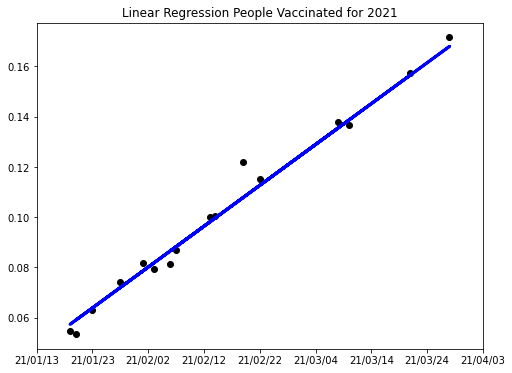

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics
# daily_vaccines = daily_vaccines.drop('Entity',axis=1)
# covid_19_data = covid_19_data.drop("ObservationDate",axis=1)
#These will be the attributes we want to use
X = daily_vaccines.date_delta.values
#We want y to be our target. What's are target going to be? Idk yet lol
y = daily_vaccines.daily_vaccinations.values

X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

#Here we can choose a random state so we get consistent results across all systems.
#80-20 or 70-30 for (test/training is standard)
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.20,random_state=1001)
lr = LinearRegression()
lr.fit(train_x,train_y)
pred_y = lr.predict(test_x)

# print(pred_y)
mse = metrics.mean_squared_error(test_y, pred_y)
mse = f"{mse:.9f}"
print("mean squared error:"+mse)
# print("R-squared: {0}".format(metrics.r2_score(Y,y_pred1)))

# Plot outputs
plt.figure(figsize=(8, 6))

plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, pred_y, color='blue', linewidth=3)
# plt.xticks(X)
# plt.yticks(())
# print(plt.xticks())
# plt.xticks((plt.xticks()[0],str(plt.xticks()[0])))
xticks=plt.xticks()[0]
xticks_str=[]
first=daily_vaccines['Day'].min()
for tick in xticks:
    # d=dt.datetime.strptime(str(int(tick)),"%Y%m%d")
    xticks_str.append((first+ timedelta(days=int(tick))).strftime("%y/%m/%d"))
plt.xticks(xticks,xticks_str)
plt.title("Linear Regression People Vaccinated for 2021")

plt.show()

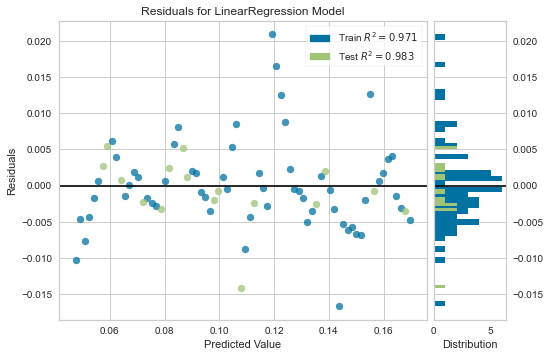

In [5]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lr)
visualizer.fit(train_x, train_y)  # Fit the training data to the visualizer
visualizer.score(test_x, test_y)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [6]:
covid_19_data = pd.read_csv('cleaned/Novel Corona Virus 2019 Dataset/covid_19_data_2021.csv')
covid_19_data['ObservationDate'] = pd.to_datetime(covid_19_data['ObservationDate'])
covid_19_data['date_delta'] = (covid_19_data['ObservationDate'] - covid_19_data['ObservationDate'].min())  / np.timedelta64(1,'D')
diff=covid_19_data[["Confirmed"]].diff().fillna(0)
covid_19_data["Confirmed_diff"]=diff["Confirmed"]
covid_19_data.head()


,ObservationDate,Confirmed,Deaths,Recovered,date_delta,Confirmed_diff
0,2021-01-01,20252991,354242,0,0.0,0.0
1,2021-01-02,20553301,356749,0,1.0,300310.0
2,2021-01-03,20762047,358196,0,2.0,208746.0
3,2021-01-04,20946329,360288,0,3.0,184282.0
4,2021-01-05,21181440,364002,0,4.0,235111.0


mean squared error:0.001214634


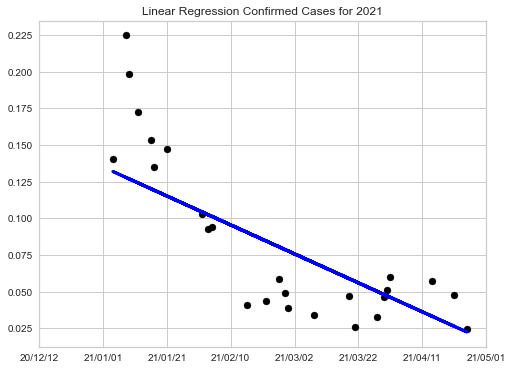

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics
from sklearn import preprocessing

# daily_vaccines = daily_vaccines.drop('Entity',axis=1)
# covid_19_data = covid_19_data.drop("ObservationDate",axis=1)
#These will be the attributes we want to use
X = covid_19_data.date_delta.values
#We want y to be our target. What's are target going to be? Idk yet lol
# y = covid_19_data.Confirmed_diff.values
y=preprocessing.normalize([covid_19_data.Confirmed_diff.values])[0]


X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

#Here we can choose a random state so we get consistent results across all systems.
#80-20 or 70-30 for (test/training is standard)
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.20,random_state=1001)
lr = LinearRegression()
lr.fit(train_x,train_y)

pred_y = lr.predict(test_x)

mse = metrics.mean_squared_error(test_y, pred_y)
mse = f"{mse:.9f}"
print("mean squared error:"+mse)

# Plot outputs
plt.figure(figsize=(8, 6))

plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, pred_y, color='blue', linewidth=3)
# plt.xticks(X)
# plt.yticks(())
# print(plt.xticks())
# plt.xticks((plt.xticks()[0],str(plt.xticks()[0])))
xticks=plt.xticks()[0]
xticks_str=[]
first=covid_19_data['ObservationDate'].min()
for tick in xticks:
    # d=dt.datetime.strptime(str(int(tick)),"%Y%m%d")
    xticks_str.append((first+ timedelta(days=int(tick))).strftime("%y/%m/%d"))
plt.xticks(xticks,xticks_str)
plt.title("Linear Regression Confirmed Cases for 2021")

plt.show()

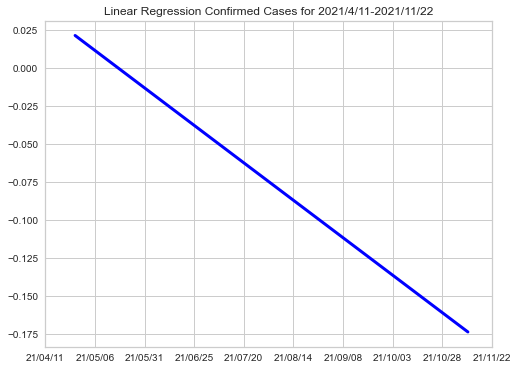

Model took 0.14151954650878906 seconds 


In [8]:
import time
start_time = time.time()

max_x=test_x.max()
test_x=np.array([[x] for x in range(int(max_x)+1,int(max_x)+200)])

pred_y = lr.predict(test_x)


# Plot outputs
plt.figure(figsize=(8, 6))

plt.plot(test_x, pred_y, color='blue', linewidth=3)

xticks=plt.xticks()[0]
xticks_str=[]
first=covid_19_data['ObservationDate'].min()
for tick in xticks:
    xticks_str.append((first+ timedelta(days=int(tick))).strftime("%y/%m/%d"))
    
plt.xticks(xticks,xticks_str)
plt.title("Linear Regression Confirmed Cases for 2021/4/11-2021/11/22")

plt.show()


print("Model took %s seconds " % (time.time() - start_time))

In [9]:
daily_vaccines = pd.read_csv('cleaned/compare/us-daily-vaccines-normalized.csv')
covid_19_data = pd.read_csv('cleaned/compare/covid_19_data.csv')
daily_vaccines.head()


,Day,daily_vaccinations
0,1/22/2021,0.058307
1,1/23/2021,0.063109
2,1/24/2021,0.066902
3,1/25/2021,0.067127
4,1/26/2021,0.066949


In [10]:
covid_19_data['ObservationDate'] = pd.to_datetime(covid_19_data['ObservationDate'])
covid_19_data['date_delta'] = (covid_19_data['ObservationDate'] - covid_19_data['ObservationDate'].min())  / np.timedelta64(1,'D')
diff=covid_19_data[["Confirmed"]].diff().fillna(0)
covid_19_data["Confirmed_diff"]=diff["Confirmed"]
covid_19_data.head()

,ObservationDate,Confirmed,Deaths,Recovered,date_delta,Confirmed_diff
0,2021-01-22,24902437,421849,0,0.0,0.0
1,2021-01-23,25073050,425194,0,1.0,170613.0
2,2021-01-24,25204112,427093,0,2.0,131062.0
3,2021-01-25,25356081,429066,0,3.0,151969.0
4,2021-01-26,25503621,433073,0,4.0,147540.0


In [11]:
from scipy import stats
print("Pearson's correlation coefficient:"+str(stats.pearsonr(covid_19_data["Confirmed_diff"],daily_vaccines["daily_vaccinations"] )[0]))

Pearson's correlation coefficient:-0.6829676521183081


# Linear Regression country_vaccinations_normalized

In [12]:
covid_19_world = pd.read_csv("cleaned/COVID-19 World Vaccination Progress/country_vaccinations_normalized.csv")
covid_19_world['date'] = pd.to_datetime(covid_19_world['date'])
covid_19_world['date_delta'] = (covid_19_world['date'] - covid_19_world['date'].min())  / np.timedelta64(1,'D')
covid_19_world.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,date_delta
0,2020-12-20,0.000533,0.000818,0.0,0.0
1,2020-12-21,0.000588,0.000904,0.0,1.0
2,2020-12-22,0.000588,0.000904,0.0,2.0
3,2020-12-23,0.000966,0.001483,0.0,3.0
4,2020-12-24,0.000966,0.001483,0.0,4.0


mean squared error:0.000112214


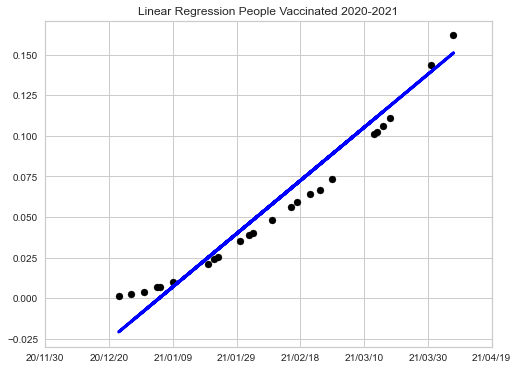

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics
# daily_vaccines = daily_vaccines.drop('Entity',axis=1)
# covid_19_data = covid_19_data.drop("ObservationDate",axis=1)
#These will be the attributes we want to use
X = covid_19_world.date_delta.values
#We want y to be our target. What's are target going to be? Idk yet lol
y = covid_19_world.people_vaccinated.values

X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)

#Here we can choose a random state so we get consistent results across all systems.
#80-20 or 70-30 for (test/training is standard)
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.20,random_state=1001)
lr = LinearRegression()
lr.fit(train_x,train_y)
pred_y = lr.predict(test_x)
# print(pred_y)
mse = metrics.mean_squared_error(test_y, pred_y)
mse = f"{mse:.9f}"
print("mean squared error:"+mse)
# print("R-squared: {0}".format(metrics.r2_score(Y,y_pred1)))

# Plot outputs
plt.figure(figsize=(8, 6))

plt.scatter(test_x, test_y,  color='black')
plt.plot(test_x, pred_y, color='blue', linewidth=3)
# plt.xticks(X)
# plt.yticks(())
# print(plt.xticks())
# plt.xticks((plt.xticks()[0],str(plt.xticks()[0])))
xticks=plt.xticks()[0]
xticks_str=[]
first=covid_19_world['date'].min()
for tick in xticks:
    # d=dt.datetime.strptime(str(int(tick)),"%Y%m%d")
    xticks_str.append((first+ timedelta(days=int(tick))).strftime("%y/%m/%d"))
plt.xticks(xticks,xticks_str)
plt.title("Linear Regression People Vaccinated 2020-2021")

plt.show()

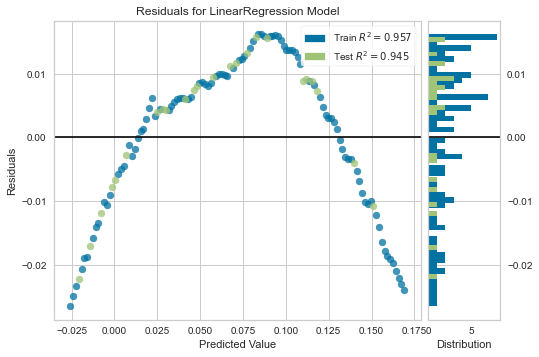

In [14]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lr)
visualizer.fit(train_x, train_y)  # Fit the training data to the visualizer
visualizer.score(test_x, test_y)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Precentage of people fully vaccinated

In [15]:
# TODO total people fully vaccinated /(usa population - fully vaccinated)
covid_19_world = pd.read_csv("cleaned/COVID-19 World Vaccination Progress/country_vaccinations_grouped_by_month.csv")



In [16]:
diff=covid_19_world[["people_fully_vaccinated"]].diff().fillna(0)
covid_19_world["fully_vaccinated_diff"]=diff["people_fully_vaccinated"]

In [17]:
covid_19_world.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,fully_vaccinated_diff
0,2020-12-31,2794588.0,2794588.0,0.0,0.0
1,2021-01-31,31123299.0,25201143.0,5657142.0,5657142.0
2,2021-02-28,75236003.0,49772180.0,24779920.0,19122778.0
3,2021-03-31,150273292.0,97593290.0,54607041.0,29827121.0
4,2021-04-30,209406814.0,131247546.0,84263408.0,29656367.0


In [18]:
average_diff=covid_19_world["fully_vaccinated_diff"].mean()
print("Average number of additional people fully vaccinated every moneth: "+str(average_diff))

Average number of additional people fully vaccinated every moneth: 16852681.6


In [19]:
population=pd.read_csv("cleaned/Countries population by year 2020/population_by_country_2020.csv")
population.head()

,Country (or dependency),Population (2020),Density (P/Km�),Med. Age
0,United States,330610570,36,38


In [20]:
population_num=list(population["Population (2020)"])[0]
print(population_num)

330610570


In [21]:
last_full_vaccinated=covid_19_world["people_fully_vaccinated"][len(covid_19_world["people_fully_vaccinated"])-1]
percentage=(last_full_vaccinated/population_num)*100
print(percentage)

25.487209316991894


In [22]:
need=(population_num*70)/100
need

231427399.0

In [23]:
print("we will get to 70% in "+str(need/average_diff)+" months")


we will get to 70% in 13.732378294027699 months
